In [1]:
using DrWatson;
@quickactivate "MATH361Lectures"
using LinearAlgebra, Latexify, SpecialMatrices, DataFrames, StatsPlots;
import MATH361Lectures;

# Conditioning and Error Estimation for Linear Systems

This lecture covers error estimation and conditioning in the context of the problem of solving systems of linear equations. 

We recommend watching [this lecture video](https://www.youtube.com/watch?v=3Fv_hdfPJ6A&list=PLvUvOH0OYx3BcZivtXMIwP6hKoYv0YvGn&index=12&t=44s) as a suplement to this lecture.  

Let's take a minute to reflect on the general concept of conditioning introduced in a previous lecture. 

> Intuitively, the *conditioning* of a problem measures how sensitive it is to small changes (perturbations) in the data; if the problem is very sensitive, it is inherently more difficult to solve using finite precision arithmetic. Quoted from [*Scientific Computing*](https://link.springer.com/book/10.1007/978-3-319-04325-8) by Gander, Gander, and Kwok.
  

The *condition number* measures the conditioning of a problem. 

The point here is that if a problem is ill-conditioned (this being determined by the value of the condition number) then we are unlikely to be able to find a suitable algorithm for solving the problem. Again we highlight that conditioning is a property of a problem and is independent of any particular method of solving the problem. 

For a linear system $Ax=b$, the **data** are the matrix $A$ and vector $b$ and the **solution** is the vector $x$. We use vector and matrix norms to measure small changes in the data for a linear system. Furthermore, the condition number for a linear system will be expressed in terms of matrix norms. That is, if $A$ is a matrix and $\|\cdot\|_{p}$ is a matrix norm, the condition number of $A$ with respect to the norm $\|\cdot\|_{p}$ is denoted by $\kappa_{p}(A)$ and defined to be

$$\kappa_{p}(A) = \|A\|_{p}\|A^{-1}\|_{p}.$$

Let's discuss how this expression arises and then look at some examples. 

There are two ways in which the problem data can be perturbed, either a perturbation to the matrix $A$ or a perturbation to the vector $b$. For now, we consider only a perturbation to the vector $b$. Suppose that 

1) $x$ is the exact solution to $Ax=b$, and

2) $b + \beta $ is a (small) perturbation to $b$. 

Now, $x+\xi$ is the solution to $A(x+\xi) = b + \beta$. Finally, since $A(x+\xi) = Ax + A\xi = b + \beta$ and $Ax=b$ we have that $A\xi = \beta$ and thus $\xi = A^{-1}\beta$, provided that $A$ is invertible. 

To determine the conditioning of the problem $Ax=b$ we need to examine the ratio of the relative change in output to the relative change in the input. That is

$$\frac{\frac{\|x+\xi - x\|}{\|x\|}}{\frac{\|b+\beta - b\|}{\|b\|}} = \frac{\frac{\|\xi\|}{\|x\|}}{\frac{\|\beta\|}{\|b\|}}=\frac{\|\xi\|}{\|\beta\|}\frac{\|b\|}{\|x\|} = \frac{\|A^{-1}\beta\|}{\|\beta\|}\frac{\|Ax\|}{\|x\|}\leq \frac{\|A^{-1}\|_{p}\|\beta\|}{\|\beta\|}\frac{\|A\|_{p}\|x\|}{\|x\|}=\|A^{-1}\|_{p}\|A\|_{p}$$

The previous manipulation demonstrates that perturbations to the problem data $b$ result in a ratio of relative change in output to the relative change in the input that is bounded by the quantity $\|A^{-1}\|_{p}\|A\|_{p}$. One may also show that the same expression arises as a bound for perturbations to the problem data $A$. This is why we define the **condition number** for a linear system to be

$$\kappa_{p}(A) = \|A\|_{p}\|A^{-1}\|_{p}.$$

Either when it is clear from context or irrelevant which matrix norm is being used, we will simply write $\kappa(A)$ for the condition number of a matrix $A$. 

**An observation:** In the homework you will show that if $I$ is the indentity matrix and $\|\cdot\|$ is a matrix norm induced by a vector norm, then $\|I\|=1$. Now

$$1 = \|I\| = \|AA^{-1}\| \leq \|A\|\|A^{-1}\| = \kappa(A).$$

Because of this, if a matrix $A$ **has a condition number that is greater than 1** we say that $A$ is **ill-conditioned.** A linear system $Ax=b$ with a matrix $A$ that is ill-conditioned is said to be an ill-conditioned linear system. 

**Note:** If $A$ is a singular matrix, then we define $\kappa(A) = \infty$. If $\kappa(A) > \frac{1}{\epsilon_{\text{mach}}}$, then we say that $A$ is *practically singular*.

Let's use Julia to explore the consequences of an ill-conditioned linear system. We will examine linear systems $Ax=b$ where $A$ is a [Hilbert matrix](https://en.wikipedia.org/wiki/Hilbert_matrix). That is, $A$ will be a matrix with entries satisfying $A_{ij} = \frac{1}{i+j-1}$. Notice that a Hilbert matrix is a symmetric matrix. For example, the $5\times 5$ Hilber matrix is    

In [2]:
A = Hilbert(5)

5×5 Hilbert{Rational{Int64}}:
 1//1  1//2  1//3  1//4  1//5
 1//2  1//3  1//4  1//5  1//6
 1//3  1//4  1//5  1//6  1//7
 1//4  1//5  1//6  1//7  1//8
 1//5  1//6  1//7  1//8  1//9

Note that this matrix is a symmetric matrix with rational entries as follows: 

In [3]:
latexify([1 1//2 1//3 1//4 1//5; 1//2 1//3 1//4 1//5 1//6; 1//3 1//4 1//5 1//6 1//7; 1//4 1//5 1//6 1//7 1//8; 1//5 1//6 1//7 1//8 1//9]) |> display

L"\begin{equation}
\left[
\begin{array}{ccccc}
1 & \frac{1}{2} & \frac{1}{3} & \frac{1}{4} & \frac{1}{5} \\
\frac{1}{2} & \frac{1}{3} & \frac{1}{4} & \frac{1}{5} & \frac{1}{6} \\
\frac{1}{3} & \frac{1}{4} & \frac{1}{5} & \frac{1}{6} & \frac{1}{7} \\
\frac{1}{4} & \frac{1}{5} & \frac{1}{6} & \frac{1}{7} & \frac{1}{8} \\
\frac{1}{5} & \frac{1}{6} & \frac{1}{7} & \frac{1}{8} & \frac{1}{9} \\
\end{array}
\right]
\end{equation}
"

We can use Julia to compute condition numbers of matrices. For example,

In [4]:
cond(A)

476607.2502419338

Note that the default is the condition number with respect to the 2-norm.

In [5]:
cond(A,2)

476607.2502419338

To compute a condition number with respect to a different norm simpy change the value of the optional argument. 

In [6]:
cond(A,1)

943656.0

In [7]:
cond(A,Inf)

943656.0

**Question:** Why are the condition numbers with respect to the 1-norm and $\infty$-norm for this particular matrix so close? 

Here are the condition numbers for many different sized Hilbert matrices:

In [8]:
for i in 5:15
    println("The condition number for the $i by $i Hilbert matrix is ", cond(Hilbert(i)))
end

The condition number for the 5 by 5 Hilbert matrix is 476607.2502419338
The condition number for the 6 by 6 Hilbert matrix is 1.4951058641781438e7
The condition number for the 7 by 7 Hilbert matrix is 4.753673568815896e8
The condition number for the 8 by 8 Hilbert matrix is 1.5257575568347378e10
The condition number for the 9 by 9 Hilbert matrix is 4.9315332284138226e11
The condition number for the 10 by 10 Hilbert matrix is 1.602493053861801e13
The condition number for the 11 by 11 Hilbert matrix is 5.2247797042670644e14
The condition number for the 12 by 12 Hilbert matrix is 1.642582584316724e16
The condition number for the 13 by 13 Hilbert matrix is 4.4691072287967375e18
The condition number for the 14 by 14 Hilbert matrix is 3.213787720967528e17
The condition number for the 15 by 15 Hilbert matrix is 3.3659212797388026e17


It appears that Hilbert matrices are ill-conditioned. What happens if we try to solve a linear system involving a Hilbert matrix? Let's do some experiments to see. What we will do is compare the computed solution of $Ax=b$ after a small perturbation with a known exact solution. We will create perturbations by rounding.   

We begin our experiments using the $5\times 5$ Hilbert matrix and construct a vector corresponding to a known solution:

In [20]:
x = 0.1*[i for i in 1:5]
b = A*x

5-element Vector{Float64}:
 0.5
 0.35500000000000004
 0.2814285714285715
 0.23464285714285715
 0.20174603174603176

Let's look at $x$ and $b$: 

In [10]:
println("x = ", x)
println("b = ", b)

x = [0.1, 0.2, 0.30000000000000004, 0.4, 0.5]
b = [0.5, 0.35500000000000004, 0.2814285714285715, 0.23464285714285715, 0.20174603174603176]


Now we perturb $b$ by rounding:

In [11]:
b_hat = Float64.(Float32.(b))

5-element Vector{Float64}:
 0.5
 0.35499998927116394
 0.28142857551574707
 0.2346428632736206
 0.20174603164196014

Finally, let's solve $A\hat{x}=\hat{b}$ where $\hat{b}$ is our rounded version of $b$: 

In [12]:
x_hat = A \ b_hat

5-element Vector{Float64}:
 0.09999886155128976
 0.20003736019126367
 0.29980033636125286
 0.4003387689585927
 0.49982160329839664

We can compute the relative error between the solutions $x$ and $\hat{x}$:

In [13]:
rel_error = norm(x_hat-x)/norm(x)

0.0005844226973431662

Compare this with the relative change in $b$:

In [14]:
norm(b_hat - b)/norm(b)

1.753474095075257e-8

Notice that the relative error between $x$ and $\hat{x}$ is much larger than the relative error between $b$ and $\hat{b}$. Let's redo our experiment for many different sized Hilbert matrices. What we will see is that small perturbations in the input data $b$ can lead to large errors in the output. 

We proceed by writing a function that does this for any size Hilbert matrix:

In [15]:
function hilbert_error(n)
    A = Hilbert(n);
    kappa_A = cond(A);
    x = 0.1*[i for i in 1:n];
    b = A*x;
    b_hat = Float64.(Float32.(b));
    x_hat = A \ b_hat;
    rel_output = norm(x_hat-x)/norm(x);
    rel_input = norm(b_hat-b)/norm(b);
    return (size=n,condition_num=kappa_A,relative_input=rel_input, relative_output=rel_output)
end

hilbert_error (generic function with 1 method)

The input of our function ```hilbert_error``` is the size of the desired Hilbert matrix, and the output of this function is the size of the matrix, the condition number of the matrix, the relative error of the input data, and the realtive error of the output data.  

We test our function:

In [16]:
rel_in, rel_out = hilbert_error(5)

(size = 5, condition_num = 476607.2502419338, relative_input = 1.753474095075257e-8, relative_output = 0.0005844226973431662)

Now we will call our function for many different size matrices and convert the result to a data table:

In [17]:
rel_errors = [hilbert_error(i) for i in 5:15];
error_data = DataFrame();
for n in rel_errors
    push!(error_data, n);
end

We can examine the first few rows of our data table:

In [18]:
first(error_data,5)

,size,condition_num,relative_input,relative_output
,Int64,Float64,Float64,Float64
1,5,4.76607e5,1.75347e-8,0.000584423
2,6,1.49511e7,3.39979e-8,0.10251
3,7,4.75367e8,2.30039e-8,2.16147
4,8,1.52576e10,2.31082e-8,48.0901
5,9,4.93153e11,2.82462e-8,775.014


A plot allows us to see more of our data:

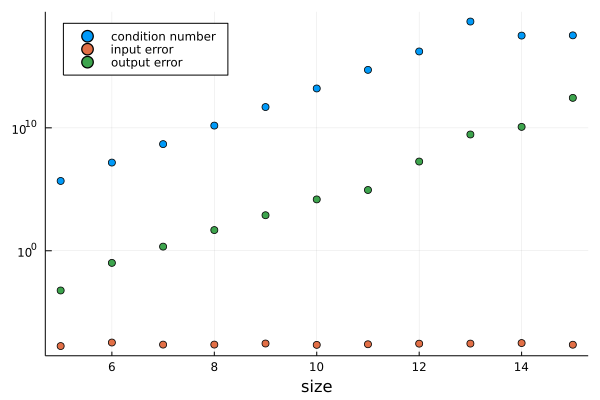

In [19]:
@df rel_errors scatter(:size,[:condition_num,:relative_input,:relative_output],yaxis=:log,label=["condition number" "input error" "output error"],legend=:topleft,xlabel="size")

Notice that we have used a log scale on the $y$-axis.

We learn a few things from the last plot:

1) Small perturbations in the data $b$ lead to large errors in the result of solving the linear system with the perturbed data, and 

2) as predicted by our theory, there is a realtionship between the condition number and the ratio of relative change in output to the relative change in the input.

In practice, we cannot compute the error for $x-\hat{x}$ because the exact solution $x$ is unknown. We sometimes call the expression $x-\hat{x}$ the **forward error.** So how can we conduct an error analysis for the problem $Ax=b$ if we cannot compute $x-\hat{x}$? The solution is to examine a theoretically related quantity that can be computed in practice.  

## Backward error analysis

Consider a linear system $Ax=b$, then for a vector $\hat{x}$ (we think of $\hat{x}$ as an estimate for the solution $x$ to $Ax=b$) we define the **residual** to be the vector

$$r = b - A\hat{x}.$$

Notice that the residual is the zero vector if and only if $\hat{x}=x$ where $Ax=b$. 

Now if $Ax=b$, then we have

$$r = b - A\hat{x} = Ax-A\hat{x}=A(x-\hat{x})$$

so that the forward error $x-\hat{x}$ is a solution to the linear system $Ay=r$. In other words $x-\hat{x}=A^{-1}r$, provided $A$ is invertible. 

From $x-\hat{x}=A^{-1}r$ we obtain 

$$\|x-\hat{x}\|=\|A^{-1}r\| \leq \|A^{-1}\|\|r\|.$$

Next, since $\|b\|=\|Ax\|\leq \|A\|\|x\|$ which implies $\frac{1}{\|x\|}\leq \frac{\|A\|}{\|b\|}$, we obtain

$$\frac{\|x-\hat{x}\|}{\|x\|}\leq \|A^{-1}\|\|r\| \frac{\|A\|}{\|b\|} = \kappa(A)\frac{\|r\|}{\|b\|}.$$

The quantity $\kappa(A)\frac{\|r\|}{\|b\|}$ gives us an **estimate** for the realtive error $\frac{\|x-\hat{x}\|}{\|x\|}$. The point is that $\kappa(A)\frac{\|r\|}{\|b\|}$ is a quantity that can alwys be computed. We call $\|r\|$ the **backward error.** Therefore, the inequality

$$\frac{\|x-\hat{x}\|}{\|x\|}\leq \kappa(A)\frac{\|r\|}{\|b\|}$$

tells us that

> when solving a linear system $Ax=b$, all that can be expected is that the backward error be small. 

We have just demonstrated an example of an important concept in numerical analysis known as [backward error analysis](https://en.wikipedia.org/wiki/Error_analysis_(mathematics)#Backward_error_analysis). Another observation from the inequality 

$$\frac{\|x-\hat{x}\|}{\|x\|}\leq \kappa(A)\frac{\|r\|}{\|b\|}$$

is that if the condition number $\kappa(A) \approx 1$, that is, if $A$ is well-conditioned, then we can obtain a very accurate approximate solution to $Ax=b$ with a *stable* algorithm.  

In the next lesson, we will see that if our matrix $A$ has some special structure, then we can often develop solution algorithms that are more efficient or more accurate than LU factorization. To get started, you may want to watch [this video on structured matrices](https://www.youtube.com/watch?v=V0qmlaH1WMI&list=PLvUvOH0OYx3BcZivtXMIwP6hKoYv0YvGn&index=13).